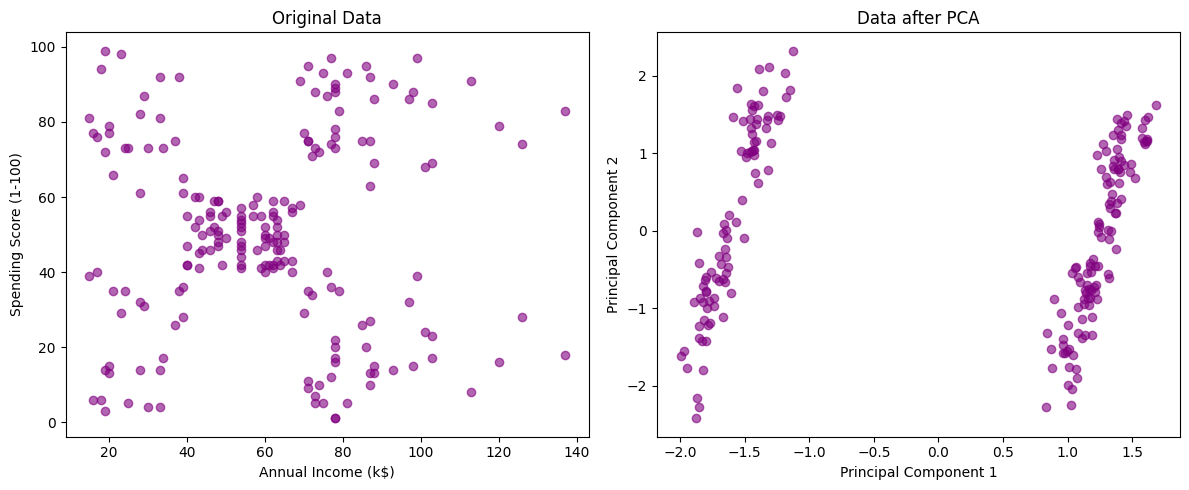

   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0           1   19                  15                      39          False   
1           2   21                  15                      81          False   
2           3   20                  16                       6           True   
3           4   23                  16                      77           True   
4           5   31                  17                      40           True   

   Gender_Male  Cluster  
0         True        2  
1         True        2  
2        False        1  
3        False        3  
4        False        1  


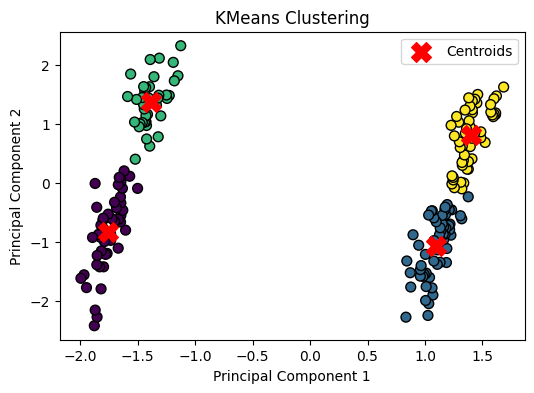

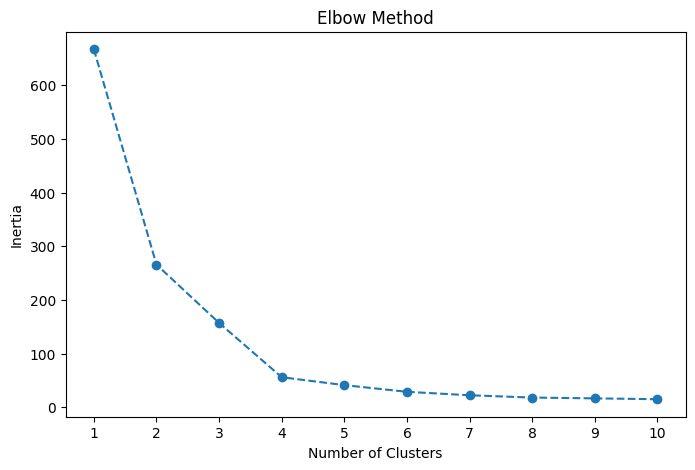

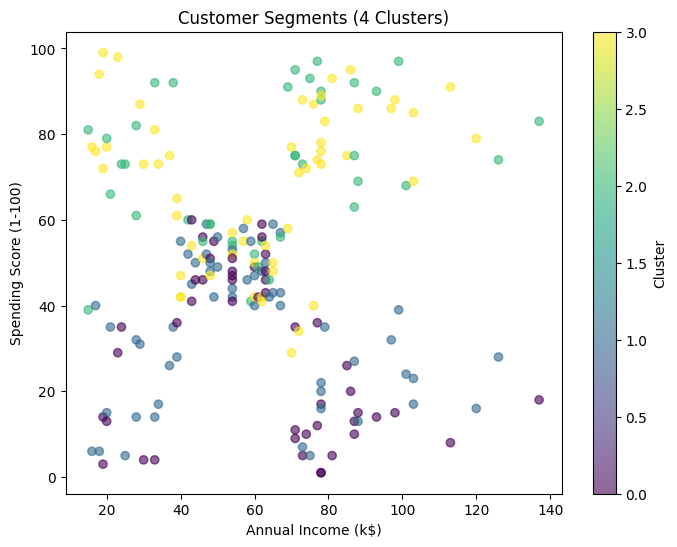

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Mall_Customers.csv')
df.head()

df.columns

df.isna().sum()

df_encoded = pd.get_dummies(df, columns=['Gender'], prefix='Gender')

df_encoded.columns

training_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)','Gender_Female', 'Gender_Male']
X = df_encoded[training_cols]
X.head()

X.shape

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Plot original data (e.g., Annual Income vs. Spending Score)
plt.figure(figsize=(12, 5))

# Left subplot: Original Data
plt.subplot(1, 2, 1)
plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c='purple', alpha=0.6) 
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Original Data')

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='purple', alpha=0.6) 
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data after PCA')
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
y_kmeans = kmeans.predict(X_pca)
df_encoded['Cluster'] = kmeans.labels_
print(df_encoded.head())

# Visualize the clusters
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Clusters")
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()





# Elbow Method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

df_encoded['Cluster'].value_counts()

plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_encoded['Annual Income (k$)'], df_encoded['Spending Score (1-100)'], c=df_encoded['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (4 Clusters)')
plt.colorbar(scatter, label='Cluster')
plt.show()


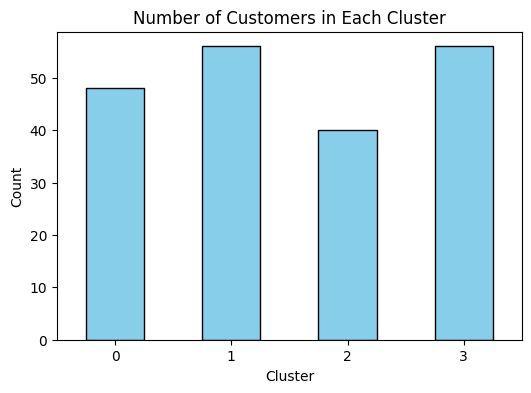

In [9]:
plt.figure(figsize=(6, 4))
df_encoded['Cluster'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Customers in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


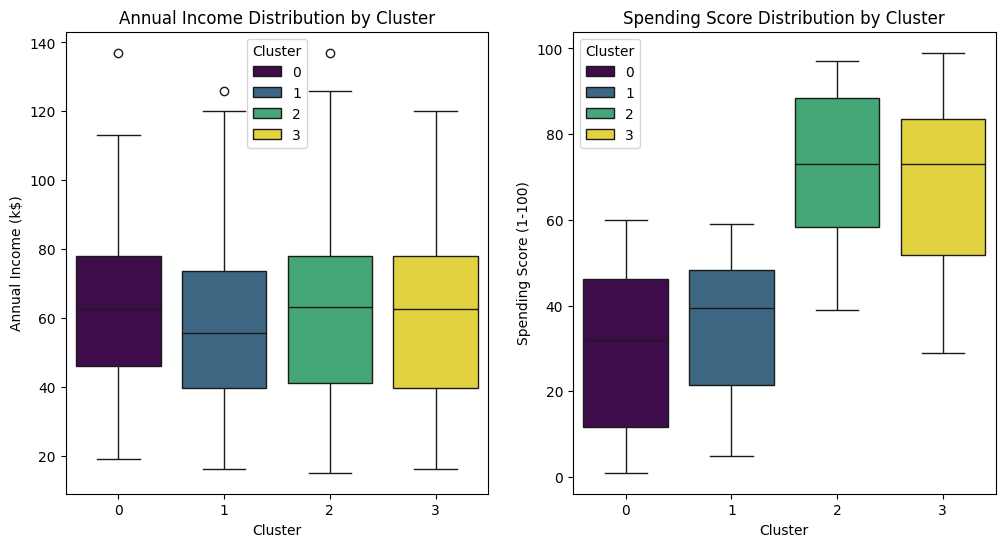

In [23]:
plt.figure(figsize=(12, 6))

# Boxplot for Annual Income
plt.subplot(1, 2, 1)
sns.boxplot(x=df_encoded['Cluster'], y=df_encoded['Annual Income (k$)'], hue=df_encoded['Cluster'], palette='viridis')
plt.title('Annual Income Distribution by Cluster')

# Boxplot for Spending Score
plt.subplot(1, 2, 2)
sns.boxplot(x=df_encoded['Cluster'], y=df_encoded['Spending Score (1-100)'], hue=df_encoded['Cluster'], palette='viridis')
plt.title('Spending Score Distribution by Cluster')

plt.show()
